In [13]:
#!wget -O house_kg_10K_ads.csv https://drive.google.com/uc?id=1DM8H-MdYDxxtjztUR2nJ67ZlXwI17BO0
# link to github for the dataset: https://www.kaggle.com/datasets/azamatkibekbaev/house-price-bishkek?group=owned

In [17]:
import pandas as pd
df = pd.read_csv('C:/Users/muniza.hashim/Desktop/senior/FYP/FYP progress/House Prices/house_kg_10K_ads.csv')

In [18]:
df.head(10)

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,source,condition,date_year,is_top_floor,is_bottom_floor,year_bin
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023,2023-02-04 20:05:01,Site,под самоотделку (ПСО),2023,False,False,2021-2025
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023,2023-02-04 20:04:49,Site,под самоотделку (ПСО),2023,False,False,2021-2025
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023,2023-02-04 20:04:37,Site,под самоотделку (ПСО),2023,False,False,2021-2025
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023,2023-02-04 20:04:01,Site,под самоотделку (ПСО),2023,False,False,2021-2025
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2013,2023-02-04 20:02:37,Site,хорошее,2023,False,True,2011-2014
5,97000,1276,76,2,Первомайский район,ЖД вокзал,кирпичный,10,12,0,2023-02-04 19:58:38,Site,евроремонт,2023,False,False,NaN
6,160000,1455,110,3,Первомайский район,NaN,кирпичный,3,3,2015,2023-02-04 19:48:55,Site,евроремонт,2023,True,False,2015-2020
7,158990,880,181,4,Октябрьский район,Магистраль,монолитный,9,14,2020,2023-02-04 19:39:26,iOS,под самоотделку (ПСО),2023,False,False,2015-2020
8,68000,1283,53,1,Октябрьский район,Магистраль,монолитный,7,9,2019,2023-02-04 19:39:14,Site,евроремонт,2023,False,False,2015-2020
9,57500,1198,48,2,Свердловский район,Аламедин-1 м-н,кирпичный,8,10,0,2023-02-04 19:39:02,Site,NaN,2023,False,False,NaN


In [19]:
df.shape


(9990, 17)

## 1. Data cleaning

##### Handling the Null Values in the data set

In [20]:
# no of data types in the data
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

print("=============================")
print(df.isnull().sum())

print("=============================")
print(df.nunique())


Categorical variables: 7
Integer variables: 0
Float variables: 0
price                 0
m2_price              0
square                0
rooms                 0
district              0
micro_district      447
building_type         0
floor                 0
floors                0
year                  0
date                  0
source                0
condition          2909
date_year             0
is_top_floor          0
is_bottom_floor       0
year_bin           4374
dtype: int64
price              1176
m2_price           1091
square              234
rooms                 7
district              4
micro_district      134
building_type         3
floor                19
floors               25
year                 69
date               9840
source                3
condition             8
date_year             2
is_top_floor          2
is_bottom_floor       2
year_bin              9
dtype: int64


In [21]:
#dropping the nulll values
df.dropna(subset=['district'], inplace=True)

# removing the duplicate rows
duplicate_rows = df.duplicated()
print(duplicate_rows.sum())

0


In [22]:
df['date_year'] = pd.to_datetime(df['date']).dt.year
df.head(1)

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,date,source,condition,date_year,is_top_floor,is_bottom_floor,year_bin
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023,2023-02-04 20:05:01,Site,под самоотделку (ПСО),2023,False,False,2021-2025


## 2. Exploratory analysis



<Axes: >

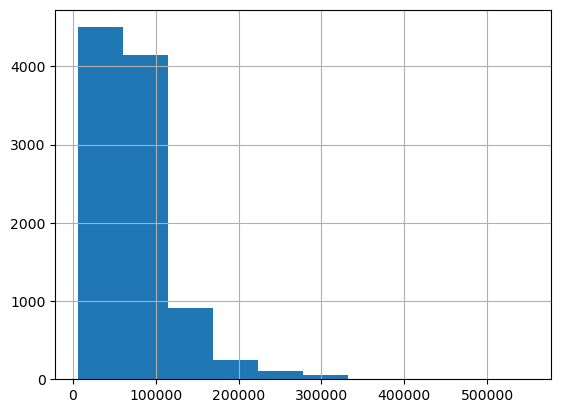

In [23]:
df['price'].hist()
# df.loc[df['price'] < df['price'].mean() + 2 * df['price'].std(), 'price'].hist()

In [24]:
# Numeric (String): Representing the counts of rooms.
# String (Categorical): Representing special categories like "6 и более" and "свободная планировка".

unique_rooms = df['rooms'].unique()
unique_rooms

array([4, 2, 1, 3, 5, 6, 0], dtype=int64)

In [25]:
unique_rooms = df['rooms'].value_counts()
unique_rooms

rooms
2    3575
3    3001
1    2616
4     671
5      75
6      41
0      11
Name: count, dtype: int64

<Axes: xlabel='rooms', ylabel='price'>

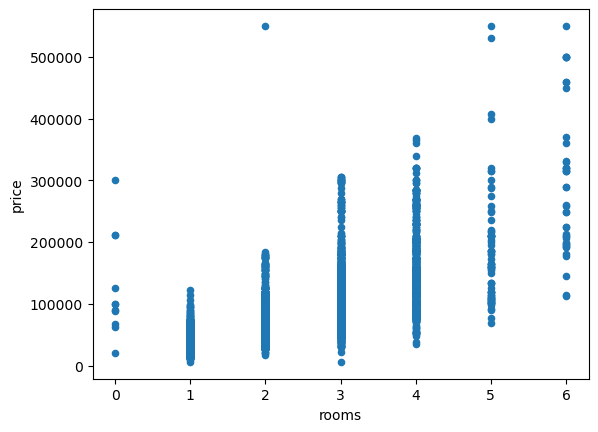

In [26]:
# Replace 'свободная планировка' with 0 (free layout)
df.loc[df['rooms'] == "свободная планировка", 'rooms'] = 0 # free layout


# Replace '6 и более' with 6 (6 and more)
df.loc[df['rooms'] == "6 и более", 'rooms'] = 6 # 6 and more

# Convert the 'rooms' column to integer data type
df["rooms"] = df["rooms"].astype(int)

df.plot.scatter('rooms', 'price')

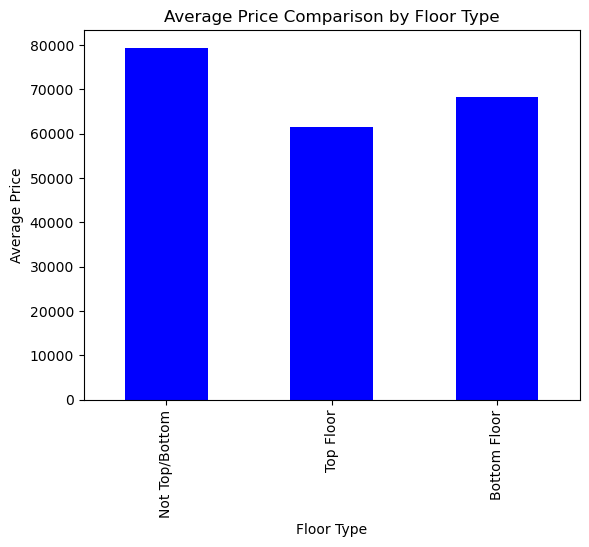

In [27]:
import matplotlib.pyplot as plt

df['is_top_floor'] = (df['floor'] == df['floors']) & (df['floor'] != 1)
df['is_bottom_floor'] = (df['floor'] == 1) & (df['floor'] != df['floors'])

# Bar Plot - Average Price by Floor Type
avg_price_by_floor_type = df.groupby(['is_top_floor', 'is_bottom_floor'])['price'].mean()
avg_price_by_floor_type.plot(kind='bar', color='blue')
plt.xlabel('Floor Type')
plt.ylabel('Average Price')
plt.xticks([0, 1, 2], ['Not Top/Bottom', 'Top Floor', 'Bottom Floor'])  # Corrected xticks
plt.title('Average Price Comparison by Floor Type')
plt.show()

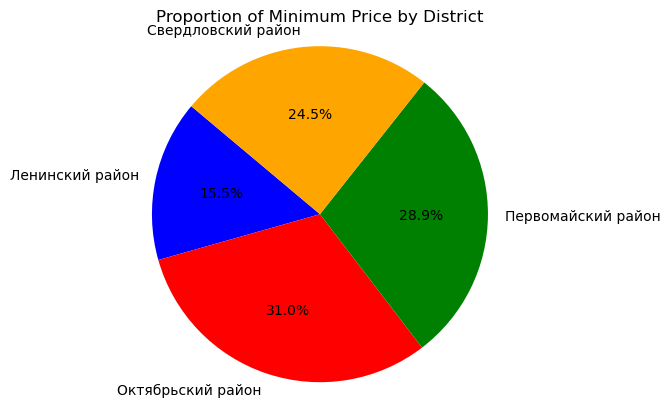

In [28]:
min_price_by_district = df.groupby('district')['price'].min()

# Calculate the total minimum price
total_min_price = min_price_by_district.sum()

# Calculate the proportion of each district's minimum price relative to the total minimum price
proportions = min_price_by_district / total_min_price

# Plotting a pie chart
plt.pie(proportions, labels=min_price_by_district.index, autopct='%1.1f%%', startangle=140, colors=['blue','red', 'green', 'orange'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Minimum Price by District')
plt.show()

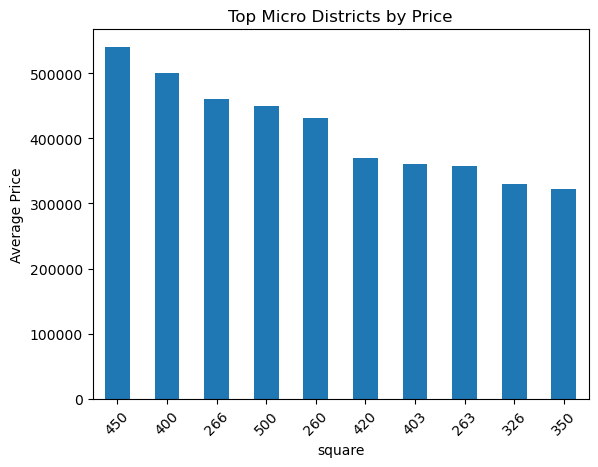

In [29]:
top_n = 10  # Number of top micro districts to display
top_micro_districts = df.groupby('square')['price'].mean().sort_values(ascending=False).head(top_n)
top_micro_districts.plot(kind='bar')
plt.xlabel('square')
plt.ylabel('Average Price')
plt.title('Top Micro Districts by Price')
plt.xticks(rotation=45)
plt.show()

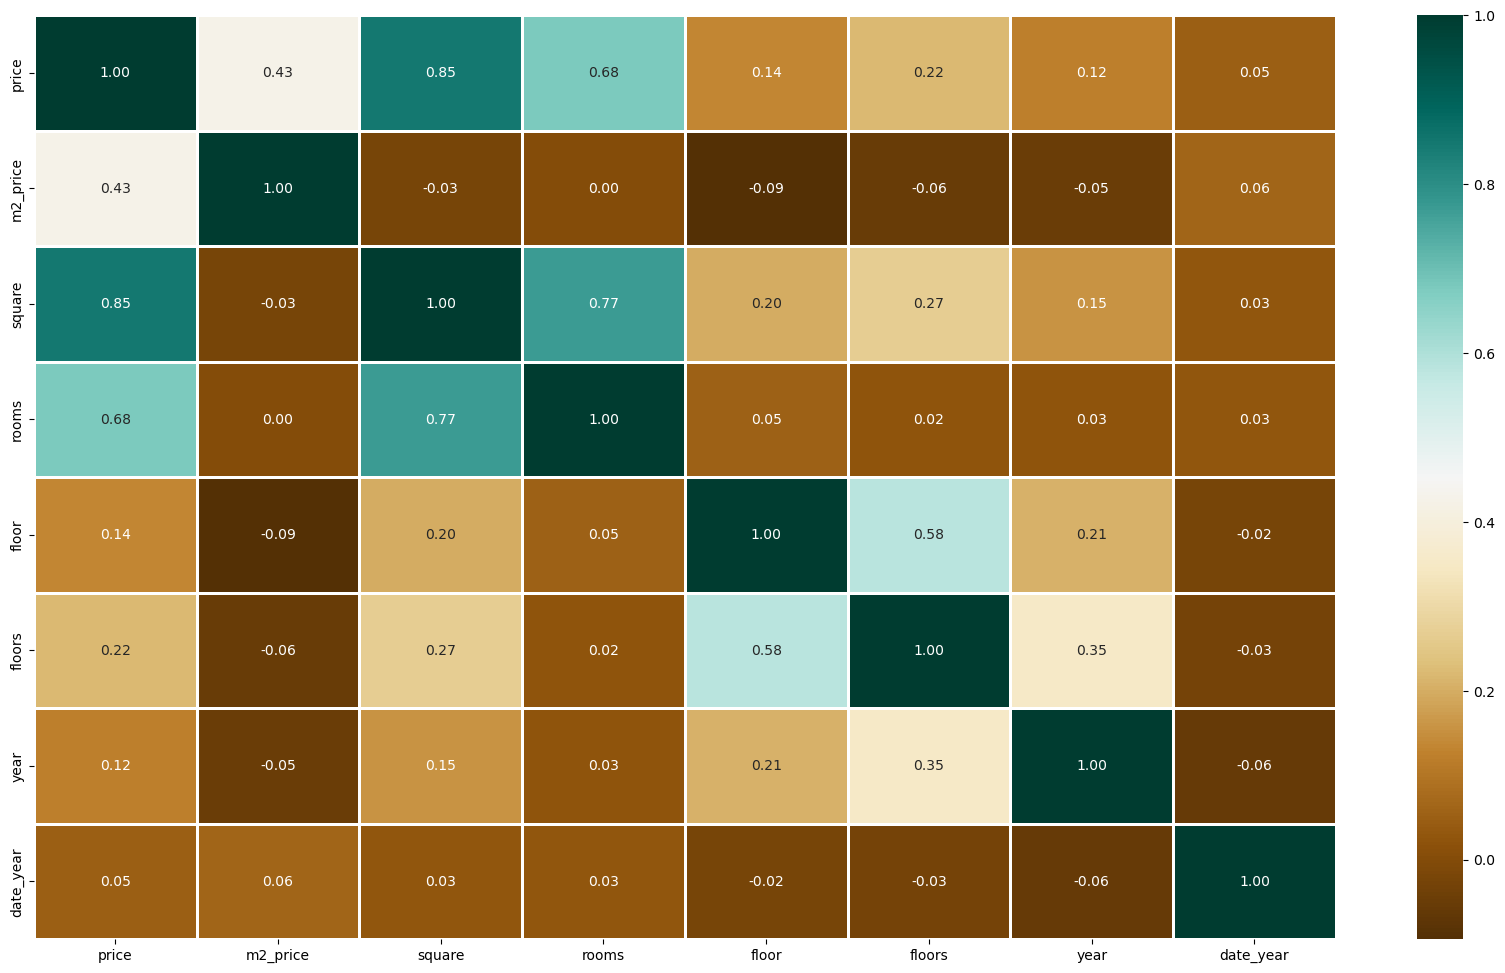

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


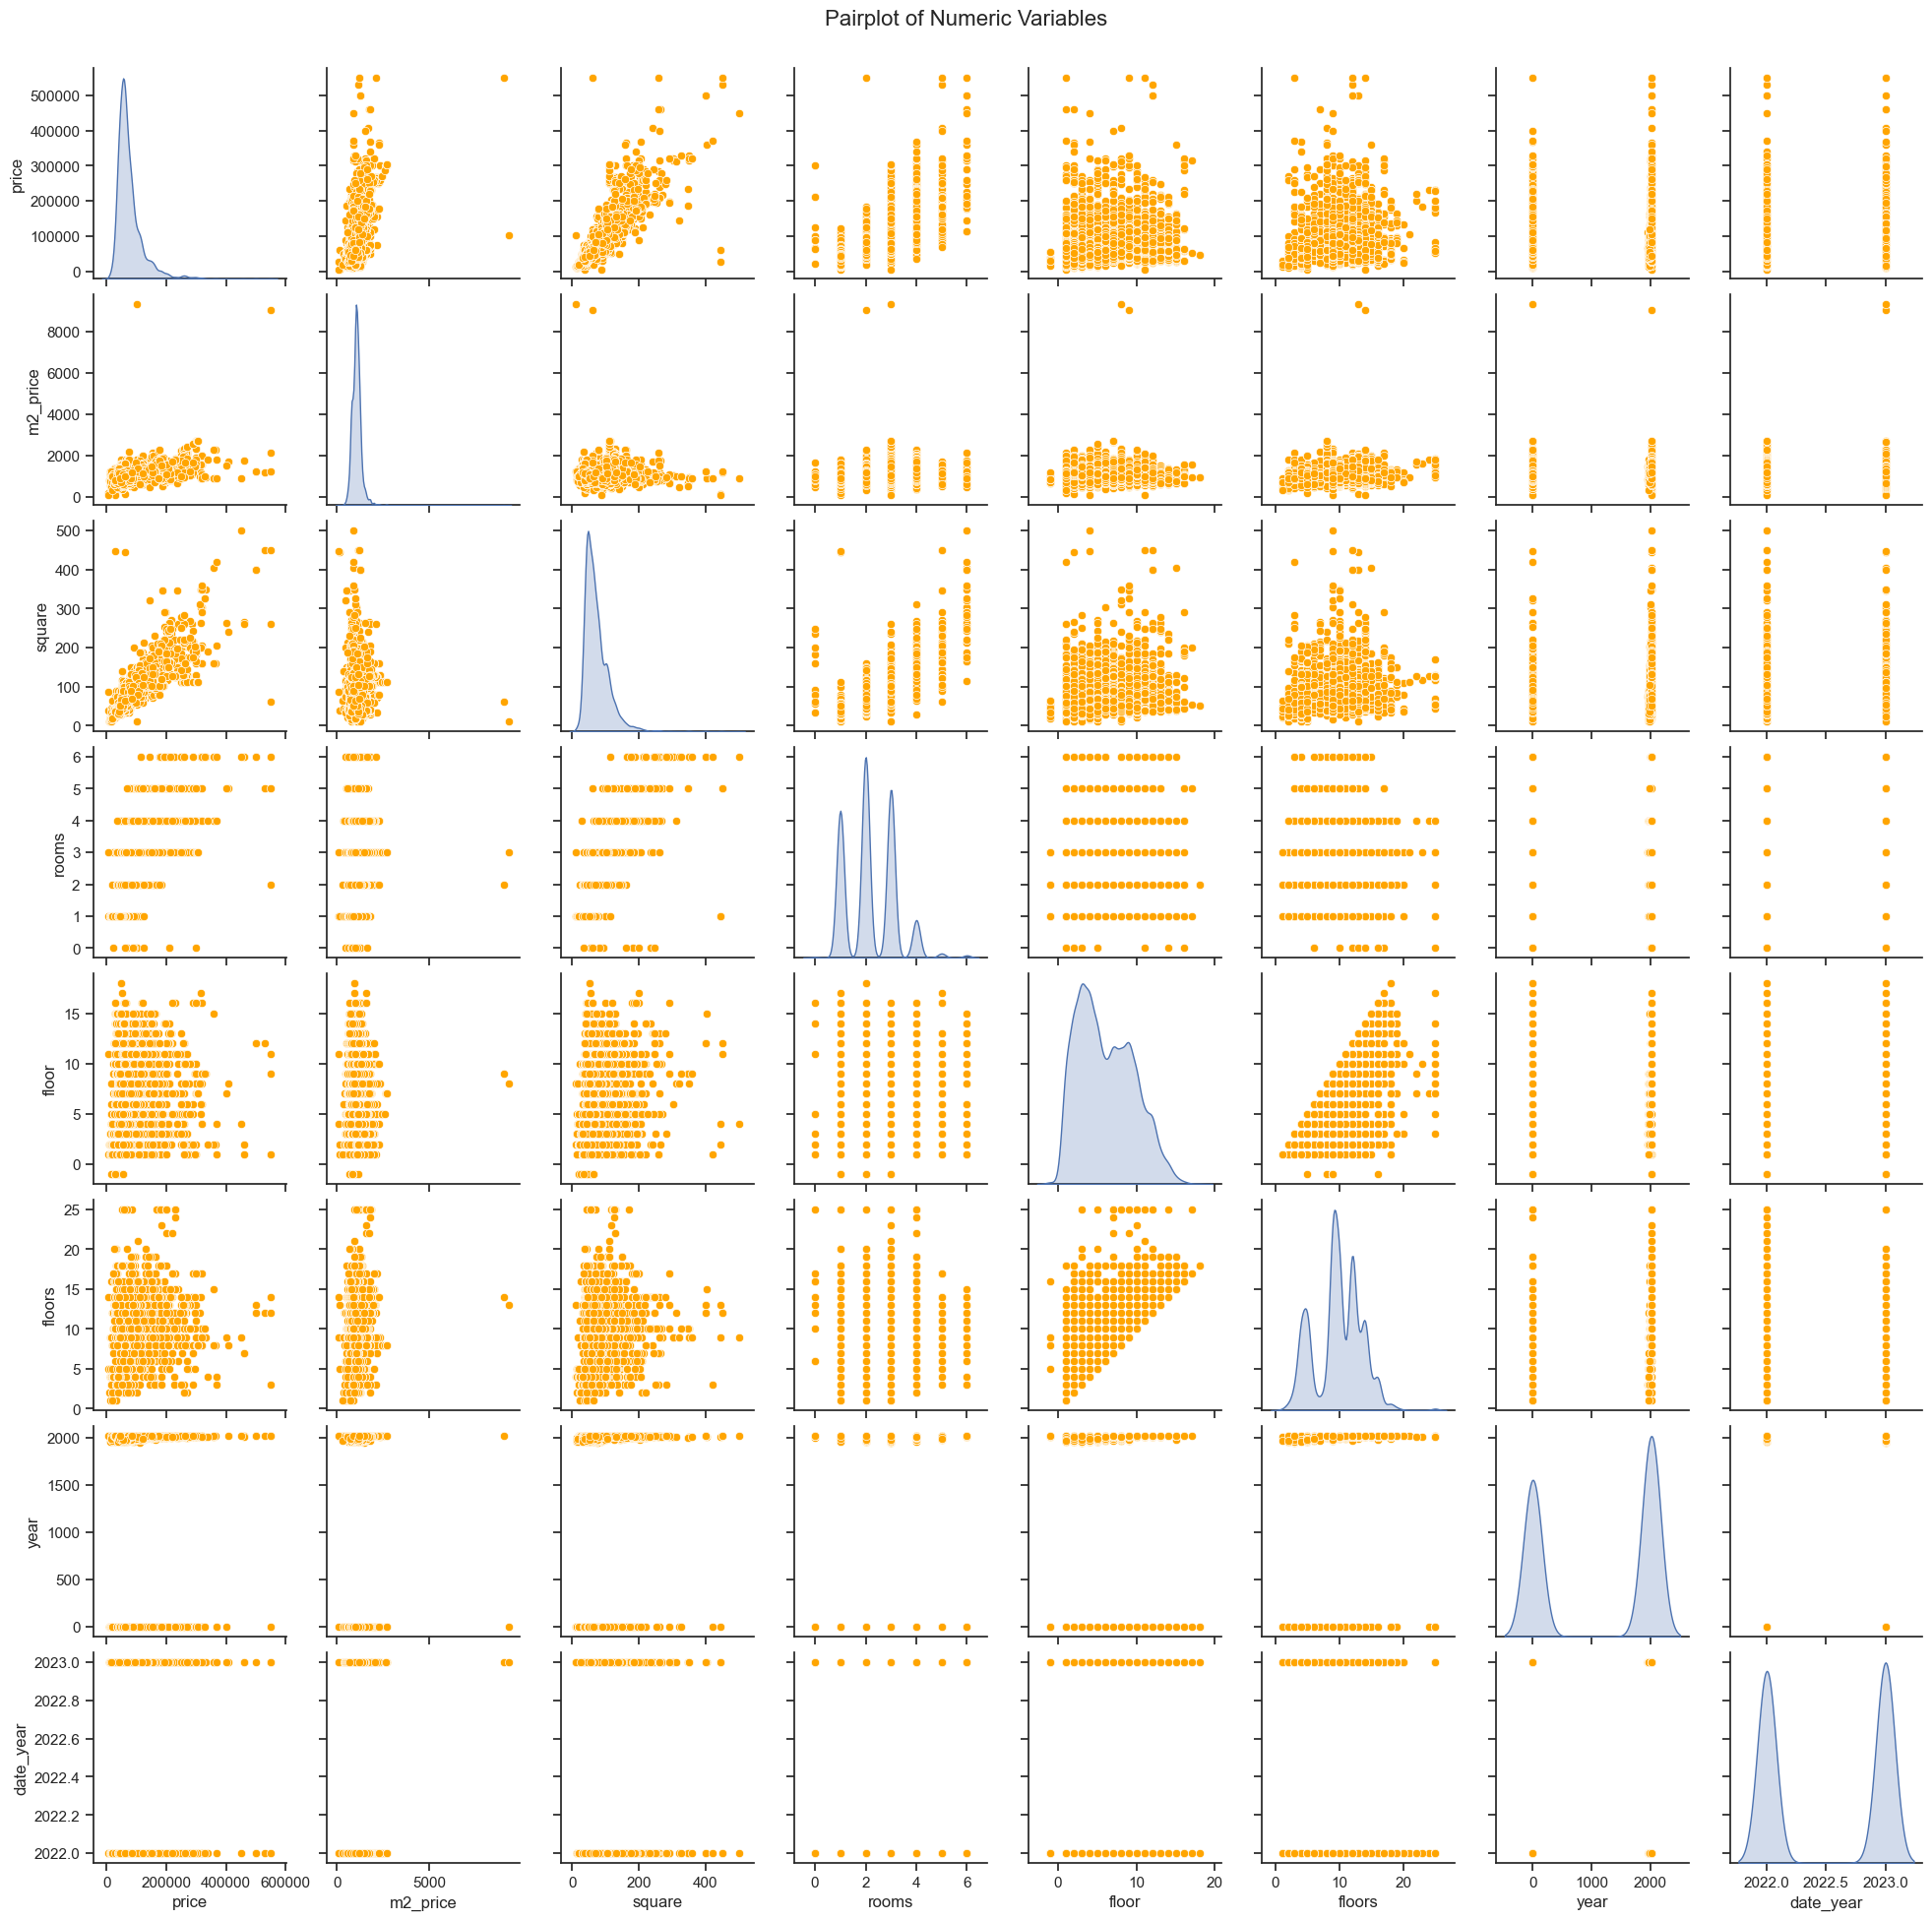

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame after loading the data.
# Make sure to replace this with your actual data loading code
# df = pd.read_csv('your_data.csv')

# Create a heatmap to visualize correlations in the DataFrame (correlation coefficient)
# Select only the numeric columns for the heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(21, 12))
sns.heatmap(numeric_df.corr(), cmap='BrBG', annot=True, fmt='.2f', linewidths=2)
plt.show()

# Function to show graphs for numeric data
def show_graphs(df):
    # Specify the columns for the pair plot
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Set the style for the plot
    sns.set(style="ticks")
    
    # Create a pair plot to visualize relationships between pairs of numeric variables
    sns.pairplot(df[numeric_columns], diag_kind="kde", markers="o", 
                 plot_kws={"color": "orange"})
    
    # Set labels for the variables
    plt.subplots_adjust(top=0.95)  # Adjust the title position
    plt.suptitle("Pairplot of Numeric Variables", fontsize=16)
    plt.show()

# Call the function to show the pair plot
show_graphs(numeric_df)


## Encoding and using all independent variables for pair plot

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle
import statsmodels.api as sm

# Load the dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv('C:/Users/muniza.hashim/Desktop/senior/FYP/FYP progress/House Prices/house_kg_10K_ads.csv')

# Feature Engineering: Create new features or modify existing ones to improve model performance.
df['date_year'] = pd.to_datetime(df['date']).dt.year  # Extract the year from the 'date' column.
df.loc[df['rooms'] == "свободная планировка", 'rooms'] = 0  # (free layout) Replace specific string in 'rooms' with 0.
df.loc[df['rooms'] == "6 и более", 'rooms'] = 6  # Replace specific string in 'rooms' with 6.
df["rooms"] = df["rooms"].astype(int)  # Convert 'rooms' column to integer data type.

# Calculate the maximum price in each microdistrict.
df['max_price_micro_district'] = df.groupby('micro_district')['price'].transform('max')
df['max_price_micro_district'].fillna(0, inplace=True)  # Fill missing values with 0.

# Calculate the minimum price in each microdistrict.
df['min_price_micro_district'] = df.groupby('micro_district')['price'].transform('min')
df['min_price_micro_district'].fillna(0, inplace=True)  # Fill missing values with 0.

# Calculate the maximum price in each district.
df['max_price_district'] = df.groupby('district')['price'].transform('max')
df['max_price_district'].fillna(0, inplace=True)  # Fill missing values with 0.

# Calculate the minimum price in each district.
df['min_price_district'] = df.groupby('district')['price'].transform('min')
df['min_price_district'].fillna(0, inplace=True)  # Fill missing values with 0.


# Encoding categorical data: Convert categorical text data into a model-understandable numerical format.
labelencoder = LabelEncoder()
df['district_encoded'] = labelencoder.fit_transform(df['district'])  # Encode 'district' column.
df['micro_district_encoded'] = labelencoder.fit_transform(df['micro_district'])  # Encode 'micro_district' column.
df['building_type_encoded'] = labelencoder.fit_transform(df['building_type'])  # Encode 'building_type' column.
df['condition_encoded'] = labelencoder.fit_transform(df['condition'])  # Encode 'condition' column.

# Define independent (predictor) and dependent (target) variables.
independent_variables = ["square", "rooms", "floors", "floor", "date_year",'district_encoded', 'micro_district_encoded', 'building_type_encoded', 
                         'condition_encoded']
dependent_variable = "price"

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


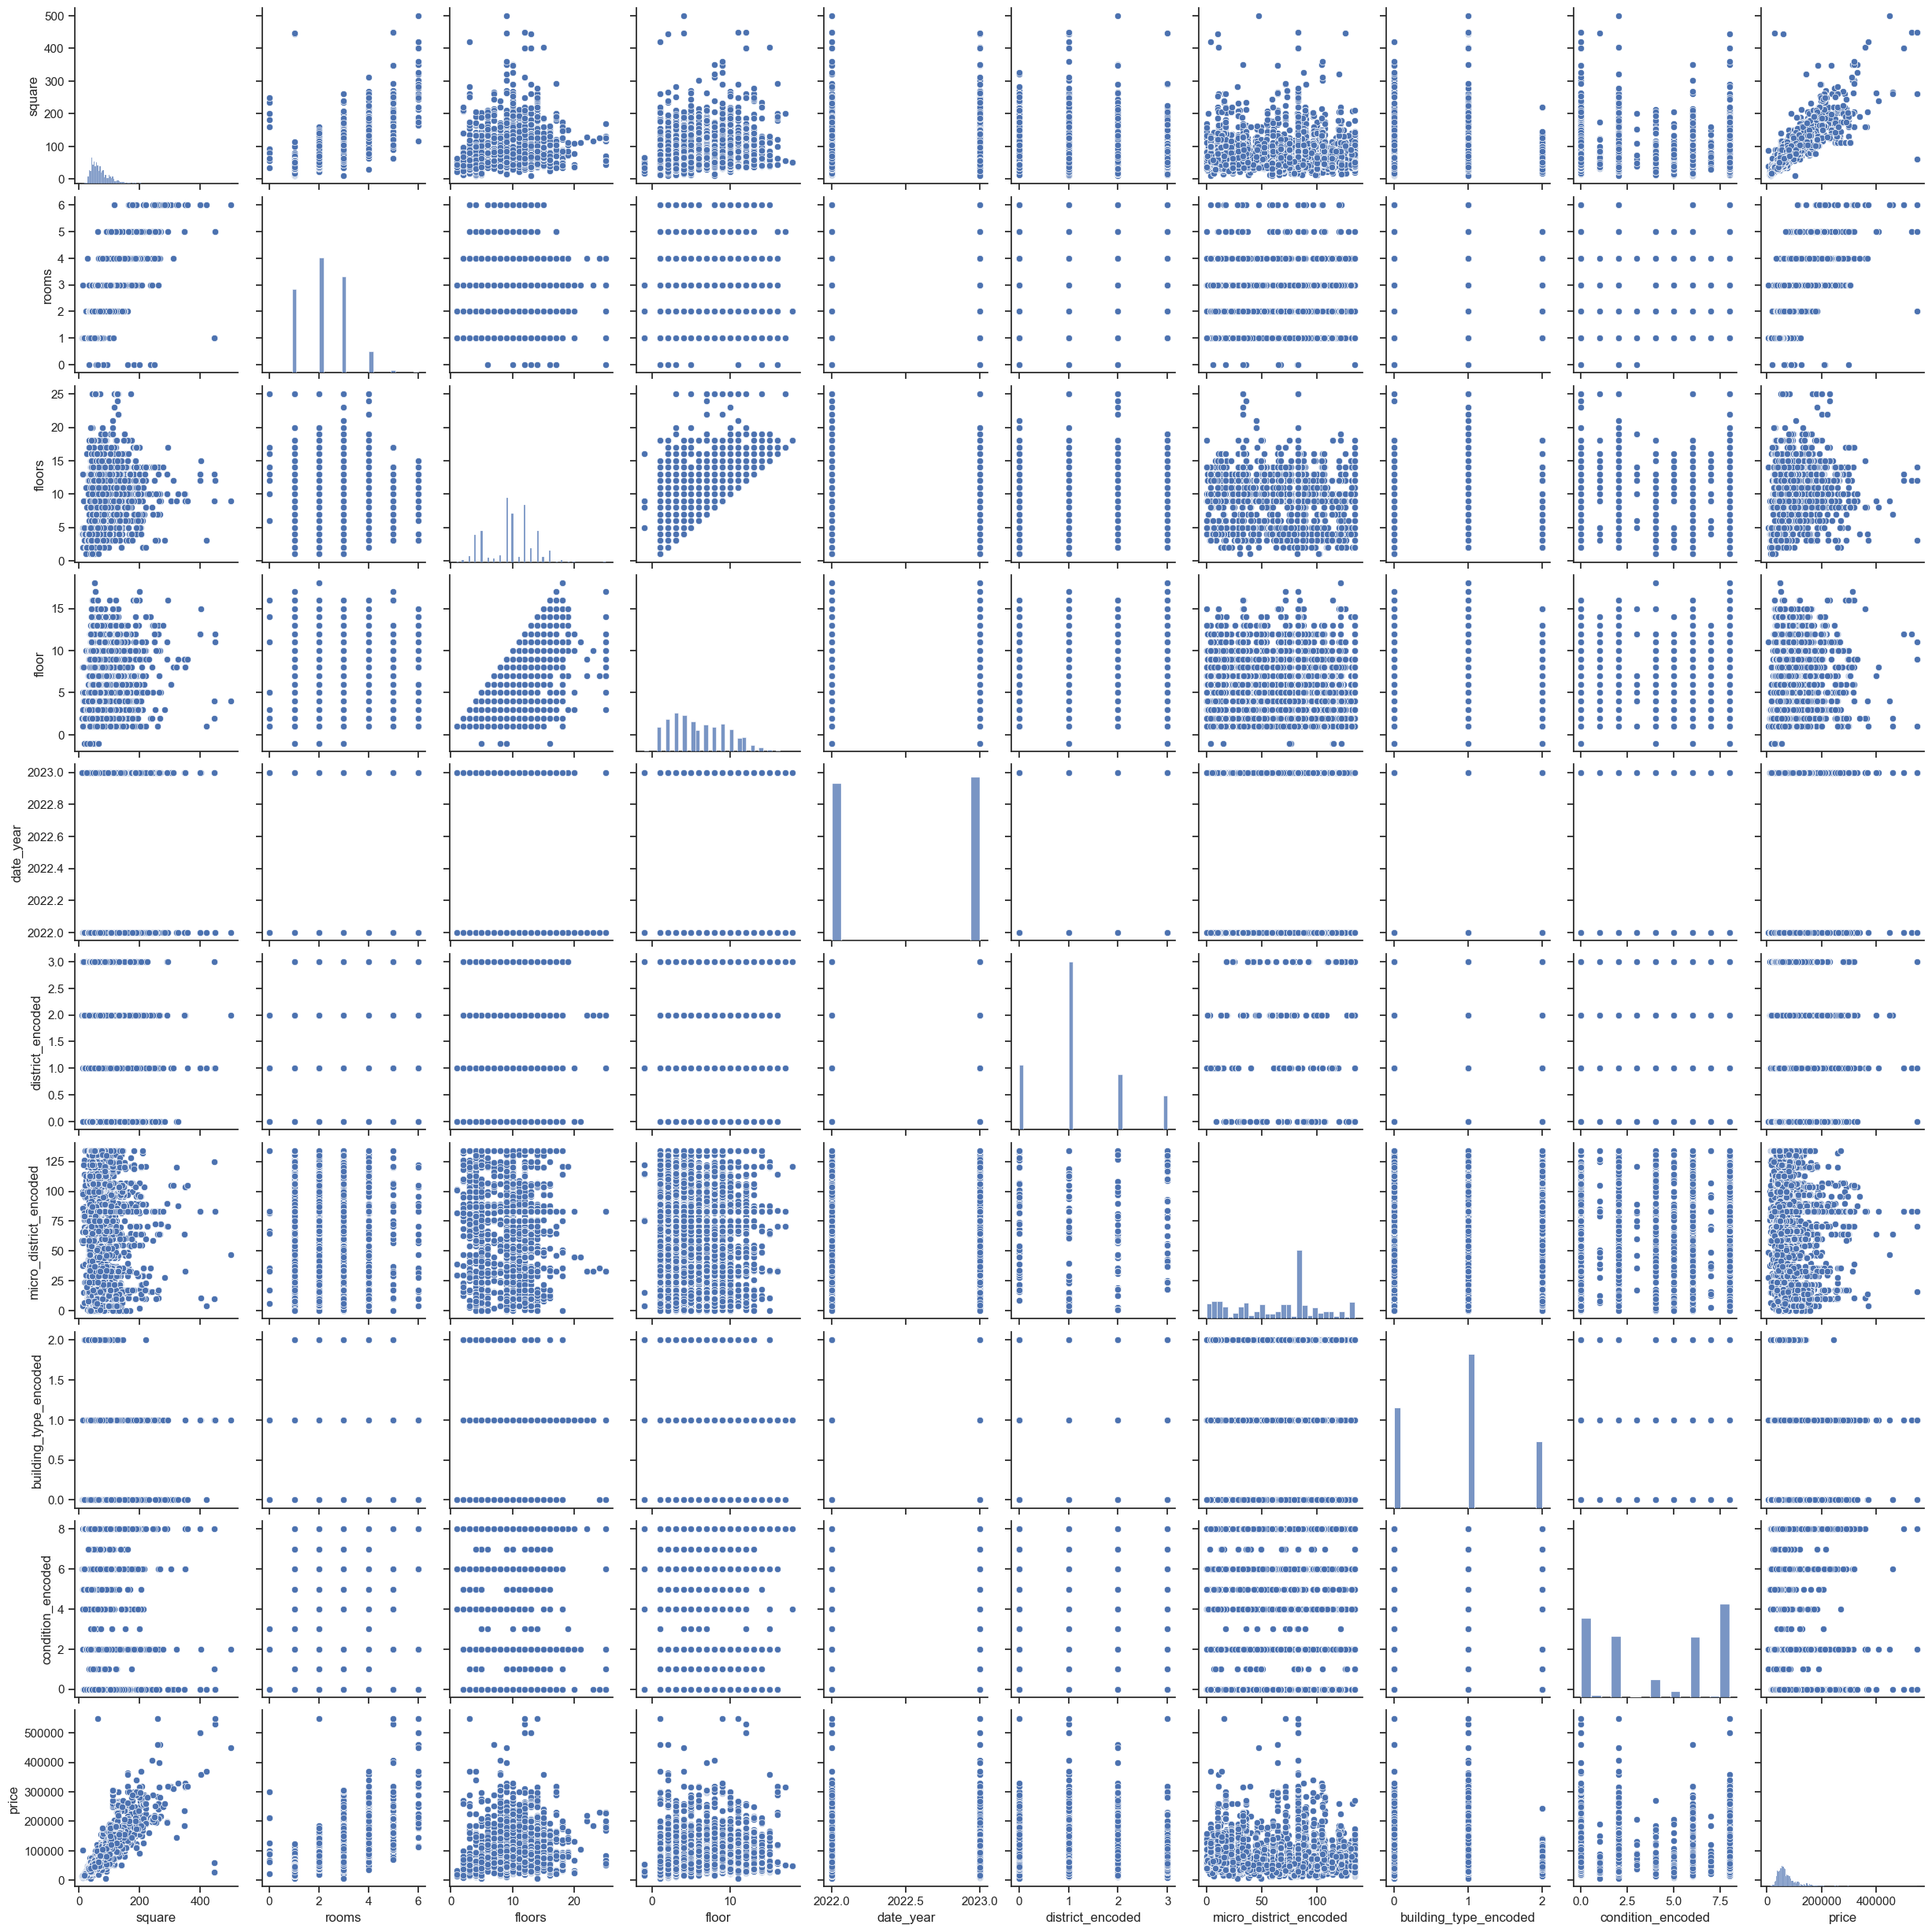

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the independent and dependent variables for the pair plot
selected_columns = independent_variables + [dependent_variable]
pairplot_df = df[selected_columns]

# Creating the pair plot
sns.pairplot(pairplot_df)

# Display the plot
plt.show()

## Feature Engineering

In [34]:
print(f"Min year: {df['year'].min()}")
print(f"Max year: {df['year'].max()}")

df['year'].fillna(0, inplace=True)
df["year"] = df["year"].astype(int)

year_bin_names = ['missing', '1951-1960', '1961-1970', '1971-1980', '1981-1990',
                  '1991-2000', '2001-2010', '2011-2014', '2015-2020', '2021-2023']
year_bin = [0, 1950,1960,1970,1980,1990,2000,2010,2014,2020,2023]
df['year'].fillna('missing', inplace=True)
df['year_bin'] = pd.cut(df['year'], bins=year_bin, labels=year_bin_names, right=True)

Min year: 0
Max year: 2025


In [35]:
df.head(5)

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,year,...,is_bottom_floor,year_bin,max_price_micro_district,min_price_micro_district,max_price_district,min_price_district,district_encoded,micro_district_encoded,building_type_encoded,condition_encoded
0,110880,720,154,4,Октябрьский район,Магистраль,кирпичный,12,14,2023,...,False,2021-2023,550000.0,23000.0,550000,12000,1,83,0,2
1,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023,...,False,2021-2023,550000.0,23000.0,550000,12000,1,83,0,2
2,57750,750,77,2,Октябрьский район,Магистраль,монолитный,5,12,2023,...,False,2021-2023,550000.0,23000.0,550000,12000,1,83,1,2
3,57000,740,77,2,Октябрьский район,Магистраль,кирпичный,5,12,2023,...,False,2021-2023,550000.0,23000.0,550000,12000,1,83,0,2
4,55000,1279,43,1,Ленинский район,Академия Наук,кирпичный,1,12,2013,...,True,2011-2014,190000.0,32200.0,550000,6000,0,22,0,6


In [36]:
print(df.columns)

Index(['price', 'm2_price', 'square', 'rooms', 'district', 'micro_district',
       'building_type', 'floor', 'floors', 'year', 'date', 'source',
       'condition', 'date_year', 'is_top_floor', 'is_bottom_floor', 'year_bin',
       'max_price_micro_district', 'min_price_micro_district',
       'max_price_district', 'min_price_district', 'district_encoded',
       'micro_district_encoded', 'building_type_encoded', 'condition_encoded'],
      dtype='object')


In [37]:
import statsmodels.api as sm
# Our features are now ready! Set up X and y based on dependent and independent variables defined, adding a constant to the list of independent variables
X = df[independent_variables]
X = sm.add_constant(X)
y = df[dependent_variable]

## Modeling phase

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

## 1st Model LinearRegression

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## evaluating LinearRegression Model

In [50]:
y_pred = regressor.predict(X_test)
y_pred

array([ 69927.39791324,  71483.87695671, 123903.67419264, ...,
        52291.75428135,  42607.54502435, 133407.92966274])

In [51]:
reg_model = sm.OLS(y_train, X_train)
result = reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2317.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:55:37   Log-Likelihood:                -91910.
No. Observations:                7992   AIC:                         1.838e+05
Df Residuals:                    7982   BIC:                         1.839e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4.23

In [52]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate r squared for the model using test data
y_pred = result.predict(X_test)
r2_score(y_test, y_pred)



0.7420782821256571

In [53]:
# Calculate the MSE using test data
mean_squared_error(y_test, y_pred)

589611924.9418002

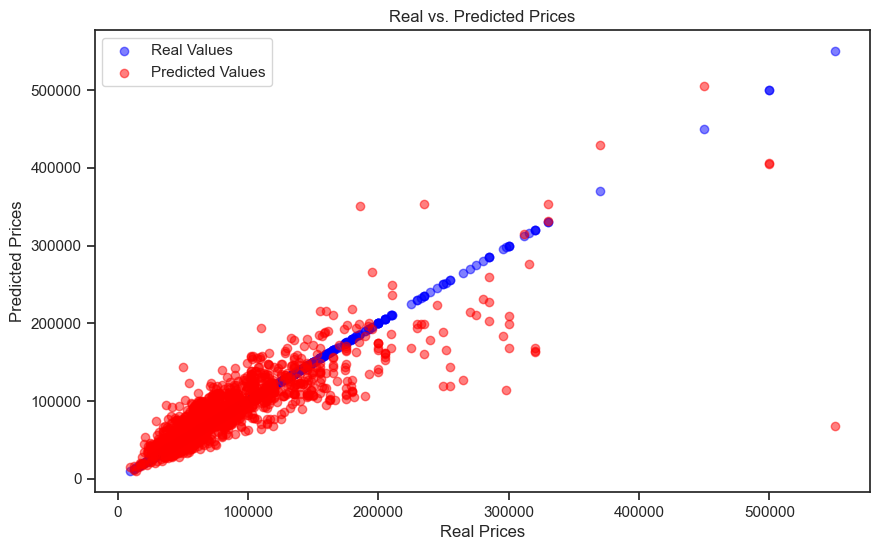

In [54]:
import matplotlib.pyplot as plt

# Assuming you have y_test (real results) and y_pred (predicted results) defined

plt.figure(figsize=(10, 6))

# Plot real values in blue
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Real Values')

# Plot predicted values in red
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs. Predicted Prices')
plt.legend()
plt.show()


In [55]:
import pickle


# Assuming 'regressor' is your trained DecisionTreeRegressor model
# Save the model using pickle
with open('DecisionTreeRegressor.pkl', 'wb') as file:
    pickle.dump(regressor, file)


In [56]:
with open('OLSModelSummary.txt', 'w') as file:
    file.write(result.summary().as_text())


## 2nd Model RandomForestRegressor

In [ ]:
print(df.columns)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume you have your data as X (features) and y (target values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate the Random Forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R squared for the model using test data
# Use the same y_pred from RandomForestRegressor
r_squared = r2_score(y_test, y_pred)
print(f"R Squared Value is: {r_squared}")


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have y_test (real results) and y_pred (predicted results) defined

plt.figure(figsize=(10, 6))

# Plot real values in blue
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Real Values')

# Plot predicted values in red
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs. Predicted Prices')
plt.legend()
plt.show()

## 3rd Model DecisionTreeRegressor

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assume you have your data as X (features) and y (target values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Decision Tree regressor
regressor2 = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
regressor2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor2.predict(X_test)

# Calculate the mean squared error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_squared = r2_score(y_test, y_pred)
print(f"R Squared Value is: {r_squared}")

Mean Squared Error: 574342995.740365
R Squared Value is: 0.7354839965380982


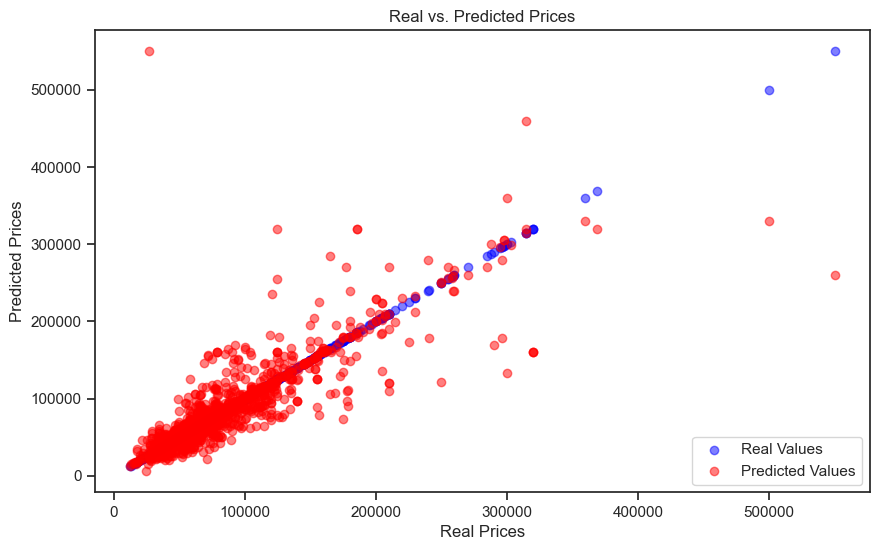

In [64]:
import matplotlib.pyplot as plt

# Assuming you have y_test (real results) and y_pred (predicted results) defined

plt.figure(figsize=(10, 6))

# Plot real values in blue
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Real Values')

# Plot predicted values in red
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Real vs. Predicted Prices')
plt.legend()
plt.show()

In [63]:
# Assume 'regressor' is your trained DecisionTreeRegressor model
regressor = regressor2  # Your DecisionTreeRegressor model

# Save the model using pickle
with open('DecisionTreeRegressor.pkl', 'wb') as file:
    pickle.dump(regressor2, file)